In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
relationships = pd.read_csv('relationships.tsv', sep='\t')

In [3]:
relationships.head()

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",associated,NaN,PD,NaN
1,PA142672624,ANKFN1,Gene,PA449899,hydrochlorothiazide,Chemical,"ClinicalAnnotation,VariantAnnotation",associated,NaN,PD,NaN
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,not associated,NaN,NaN,28628559
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,not associated,NaN,NaN,NaN
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,not associated,NaN,NaN,28628559


In [4]:
drugs = pd.read_csv('drugs.tsv', sep='\t')

In [5]:
drugs.head()

,PharmGKB Accession Id,Name,Generic Names,Trade Names,Brand Mixtures,Type,Cross-references,SMILES,InChI,Dosing Guideline,...,VIP Count,Dosing Guideline Sources,Top Clinical Annotation Level,Top FDA Label Testing Level,Top Any Drug Label Testing Level,Label Has Dosing Info,Has Rx Annotation,RxNorm Identifiers,ATC Identifiers,PubChem Compound Identifiers
0,PA166238901,17-alpha-dihydroequilenin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671798,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671798
1,PA166238881,17-alpha-dihydroequilin,NaN,NaN,NaN,Drug,PubChem Compound:9547222,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9547222
2,PA166238883,17-alpha-dihydroequilin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671797,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671797
3,PA166238882,17-alpha-estradiol sulfate,NaN,NaN,NaN,Drug,PubChem Compound:23671799,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23671799
4,PA166238921,17-beta-dihydroequilenin sulfate,NaN,NaN,NaN,Drug,PubChem Compound:71316159,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71316159


In [6]:
drugs.tail()

,PharmGKB Accession Id,Name,Generic Names,Trade Names,Brand Mixtures,Type,Cross-references,SMILES,InChI,Dosing Guideline,...,VIP Count,Dosing Guideline Sources,Top Clinical Annotation Level,Top FDA Label Testing Level,Top Any Drug Label Testing Level,Label Has Dosing Info,Has Rx Annotation,RxNorm Identifiers,ATC Identifiers,PubChem Compound Identifiers
3493,PA451978,zonisamide,"Zonisamida [Spanish],""Zonisamidum [Latin]"",""zo...","Exceglan,""Excegram"",""Excegran"",""Zonegran""",NaN,Drug,"BindingDB:10888,""ChEBI:CHEBI:10127"",""Chemical ...",C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N,"InChI=1S/C8H8N2O3S/c9-14(11,12)5-7-6-3-1-2-4-8...",No,...,1,NaN,3,NaN,Informative PGx,NaN,NaN,39998,N03AX15,5734
3494,PA10236,zopiclone,"(+-)-zopiclone,""Zopiclona [INN-Spanish]"",""Zopi...","Amoban,""Amovane"",""Imovance"",""Imovane"",""Novo-zo...",NaN,Drug,"BindingDB:50054136,""Canadian Drugs Product Dat...",CN1CCN(CC1)C(=O)OC2C3=NC=CN=C3C(=O)N2C4=NC=C(C...,InChI=1S/C17H17ClN6O3/c1-22-6-8-23(9-7-22)17(2...,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,40001,N05CF01,5735
3495,PA164924567,Zosuquidar,NaN,NaN,NaN,Drug,NaN,NaN,NaN,No,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,PA452606,zoxazolamine,NaN,NaN,NaN,Drug,NaN,NaN,NaN,No,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,PA452629,zuclopenthixol,"Clopenthixol,""Zuclopenthixolum [latin]"",""Zuclo...","Acuphase,""Clopixol""",NaN,Drug,"Canadian Drugs Product Database:02230402,""ChEB...",C1CN(CCN1CC/C=C\2/C3=CC=CC=C3SC4=C2C=C(C=C4)Cl...,InChI=1S/C22H25ClN2OS/c23-17-7-8-22-20(16-17)1...,No,...,1,DPWG,1A,NaN,Informative PGx,NaN,NaN,114176,N05AF05,5311507


In [7]:
labels = pd.read_csv('drugLabels.tsv', sep='\t')

In [8]:
labels

,PharmGKB ID,Name,Source,Biomarker Flag,Testing Level,Has Prescribing Info,Has Dosing Info,Has Alternate Drug,Cancer Genome,Prescribing,Chemicals,Genes,Variants/Haplotypes,Latest History Date (YYYY-MM-DD)
0,PA166184405,Annotation of Swissmedic Label for brexpiprazo...,Swissmedic,NaN,Actionable PGx,Prescribing Info,Dosing Info,NaN,NaN,Prescribing,brexpiprazole,CYP2D6,NaN,NaN
1,PA166184114,Annotation of Swissmedic Label for capecitabin...,Swissmedic,NaN,Actionable PGx,Prescribing Info,Dosing Info,Alternate Drug,NaN,Prescribing,capecitabine,DPYD,NaN,NaN
2,PA166184116,Annotation of Swissmedic Label for carbamazepi...,Swissmedic,NaN,Testing required,Prescribing Info,NaN,Alternate Drug,NaN,Prescribing,carbamazepine,HLA-B,HLA-B*15:02:01,NaN
3,PA166184117,Annotation of Swissmedic Label for carbasalate...,Swissmedic,NaN,Actionable PGx,NaN,NaN,NaN,NaN,NaN,carbasalate calcium,G6PD,NaN,NaN
4,PA166184122,Annotation of Swissmedic Label for ciprofloxac...,Swissmedic,NaN,Actionable PGx,NaN,NaN,NaN,NaN,NaN,ciprofloxacin,G6PD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,PA166252081,Annotation of FDA Label for infigratinib and F...,FDA,On FDA Biomarker List,Testing required,Prescribing Info,NaN,Alternate Drug,Cancer Genome,Prescribing,infigratinib,FGFR2,NaN,NaN
806,PA166252781,Annotation of FDA Label for fosdenopterin and ...,FDA,On FDA Biomarker List,Testing required,Prescribing Info,NaN,Alternate Drug,NaN,Prescribing,fosdenopterin,MOCS1,NaN,NaN
807,PA166252881,Annotation of FDA Label for tepotinib and MET,FDA,On FDA Biomarker List,Testing required,Prescribing Info,NaN,Alternate Drug,Cancer Genome,Prescribing,tepotinib,MET,NaN,NaN
808,PA166252901,"Annotation of FDA Label for tepotinib and ALK,...",FDA,On FDA Biomarker List,Informative PGx,NaN,NaN,NaN,Cancer Genome,NaN,tepotinib,ALK; EGFR,NaN,NaN


In [9]:
drugs_filtered = drugs.drop(drugs.columns[[1, 2, 3, 4, 6, 10, 
                                           11, 12, 13, 14, 15, 16, 
                                           17 ,18, 19, 20, 21, 22, 
                                           23]], axis = 1)

In [10]:
drugs_filtered['Type'].unique()

array(['Drug', 'Drug Class', 'Prodrug', 'Drug,"Biological Intermediate"',
       'Drug,"Metabolite"', 'Drug,"Ion"',
       'Drug,"Metabolite","Biological Intermediate"',
       'Drug,"Small Molecule"'], dtype=object)

In [11]:
drugs_filtered = drugs_filtered.rename(columns = {"PharmGKB Accession Id": "PharmGKB ID (Source)"})

In [12]:
drugs_filtered[drugs_filtered['SMILES'] == 'N(=O)[O-].[Na+]']

,PharmGKB ID (Source),Type,SMILES,InChI,Dosing Guideline
2979,PA166115361,Drug,N(=O)[O-].[Na+],"InChI=1S/HNO2.Na/c2-1-3;/h(H,2,3);/q;+1/p-1",No


In [13]:
labels = labels.rename(columns = {'Chemicals': 'Name (Source)'})
labels = labels.drop(columns = ['PharmGKB ID', 'Name', 'Source', 'Has Prescribing Info', 'Latest History Date (YYYY-MM-DD)'])
labels

,Biomarker Flag,Testing Level,Has Dosing Info,Has Alternate Drug,Cancer Genome,Prescribing,Name (Source),Genes,Variants/Haplotypes
0,NaN,Actionable PGx,Dosing Info,NaN,NaN,Prescribing,brexpiprazole,CYP2D6,NaN
1,NaN,Actionable PGx,Dosing Info,Alternate Drug,NaN,Prescribing,capecitabine,DPYD,NaN
2,NaN,Testing required,NaN,Alternate Drug,NaN,Prescribing,carbamazepine,HLA-B,HLA-B*15:02:01
3,NaN,Actionable PGx,NaN,NaN,NaN,NaN,carbasalate calcium,G6PD,NaN
4,NaN,Actionable PGx,NaN,NaN,NaN,NaN,ciprofloxacin,G6PD,NaN
...,...,...,...,...,...,...,...,...,...
805,On FDA Biomarker List,Testing required,NaN,Alternate Drug,Cancer Genome,Prescribing,infigratinib,FGFR2,NaN
806,On FDA Biomarker List,Testing required,NaN,Alternate Drug,NaN,Prescribing,fosdenopterin,MOCS1,NaN
807,On FDA Biomarker List,Testing required,NaN,Alternate Drug,Cancer Genome,Prescribing,tepotinib,MET,NaN
808,On FDA Biomarker List,Informative PGx,NaN,NaN,Cancer Genome,NaN,tepotinib,ALK; EGFR,NaN


In [14]:
pie_data = relationships.groupby("Association")['Association'].count()
pie_data

Association
ambiguous         17720
associated        68696
not associated    31286
Name: Association, dtype: int64

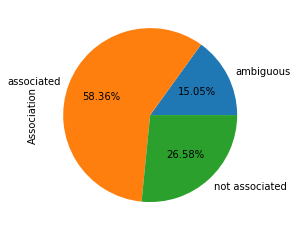

In [15]:
pie_data.plot.pie(autopct="%.2f%%");

# This is where the project actually starts

In [16]:
relationships = pd.read_csv('relationships.tsv', sep='\t')

In [17]:
values = {"Association": {"associated": 1, "not associated": 0, "ambiguous": 2}}

In [18]:
relationships = relationships.replace(values)

In [19]:
relationships.head()

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",1,NaN,PD,NaN
1,PA142672624,ANKFN1,Gene,PA449899,hydrochlorothiazide,Chemical,"ClinicalAnnotation,VariantAnnotation",1,NaN,PD,NaN
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,0,NaN,NaN,28628559
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,0,NaN,NaN,NaN
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,0,NaN,NaN,28628559


In [20]:
relationships = relationships.fillna(0)

In [21]:
relationships.head()

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",1,0.0,PD,0
1,PA142672624,ANKFN1,Gene,PA449899,hydrochlorothiazide,Chemical,"ClinicalAnnotation,VariantAnnotation",1,0.0,PD,0
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,0,0.0,0,28628559
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,0,0.0,0,0
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,0,0.0,0,28628559


In [22]:
relationships = relationships.replace(["PK", "PD"], 1)

In [23]:
relationships["PMIDs"] = relationships["PMIDs"].str.split(";").str.len()

In [24]:
relationships = relationships.fillna(0)

In [25]:
relationships

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
0,PA142672624,ANKFN1,Gene,PA447288,Essential hypertension,Disease,"ClinicalAnnotation,VariantAnnotation",1,0.0,1,0.0
1,PA142672624,ANKFN1,Gene,PA449899,hydrochlorothiazide,Chemical,"ClinicalAnnotation,VariantAnnotation",1,0.0,1,0.0
2,PA164722583,MIR2053,Gene,PA166122058,mucositis,Disease,VariantAnnotation,0,0.0,0,1.0
3,PA164722583,MIR2053,Gene,PA443937,Drug Toxicity,Disease,VariantAnnotation,0,0.0,0,0.0
4,PA164722583,MIR2053,Gene,PA446155,Precursor Cell Lymphoblastic Leukemia-Lymphoma,Disease,VariantAnnotation,0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
117697,PA166155830,rs13401281,Variant,PA445062,Neoplasms,Disease,VariantAnnotation,0,0.0,0,0.0
117698,PA166157455,rs12535293,Variant,PA447216,Schizophrenia,Disease,VariantAnnotation,0,0.0,0,0.0
117699,PA166157455,rs12535293,Variant,PA450688,olanzapine,Chemical,VariantAnnotation,0,0.0,0,0.0
117700,PA166155301,rs6506569,Variant,PA443434,"Arthritis, Rheumatoid",Disease,"ClinicalAnnotation,VariantAnnotation",2,0.0,1,1.0


In [26]:
relationships = relationships.rename(columns = {"Entity1_id": "PharmGKB ID (Source)", 
                                "Entity1_name": "Name (Source)", 
                                "Entity1_type": "Type (Source)", 
                                "Entity2_id": "PharmGKB ID (Target)", 
                                "Entity2_name": "Name (Target)", 
                                "Entity2_type": "Type (Target)"})

In [27]:
reduced = relationships.drop(columns = ["Evidence"])

In [28]:
reduced.dtypes

PharmGKB ID (Source)     object
Name (Source)            object
Type (Source)            object
PharmGKB ID (Target)     object
Name (Target)            object
Type (Target)            object
Association               int64
PK                      float64
PD                        int64
PMIDs                   float64
dtype: object

In [29]:
drugs_filtered.dtypes

PharmGKB ID (Source)    object
Type                    object
SMILES                  object
InChI                   object
Dosing Guideline        object
dtype: object

In [30]:
df = pd.merge(reduced, drugs_filtered, on = 'PharmGKB ID (Source)', how = 'inner')

In [31]:
df = pd.merge(df, labels, on = "Name (Source)", how = 'inner')

In [32]:
df = df.drop(columns = ['Name (Source)', 'Name (Target)',
                        'SMILES', 'InChI','Genes', 'Variants/Haplotypes'])

In [33]:
df = df.fillna('None')

In [34]:
df

,PharmGKB ID (Source),Type (Source),PharmGKB ID (Target),Type (Target),Association,PK,PD,PMIDs,Type,Dosing Guideline,Biomarker Flag,Testing Level,Has Dosing Info,Has Alternate Drug,Cancer Genome,Prescribing
0,PA166115361,Chemical,PA27331,Gene,1,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
1,PA166115361,Chemical,PA27331,Gene,1,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
2,PA166115361,Chemical,PA28469,Gene,1,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
3,PA166115361,Chemical,PA28469,Gene,1,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
4,PA450801,Chemical,PA117,Gene,1,0.0,1,1.0,Drug,Yes,On FDA Biomarker List,Informative PGx,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,PA451614,Chemical,PA166162379,Variant,1,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39876,PA451614,Chemical,PA35055,Gene,1,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39877,PA451614,Chemical,PA378,Gene,1,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39878,PA166122586,Chemical,PA31111,Gene,1,0.0,0,1.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,Cancer Genome,None


# Data encoding

In [35]:
X = df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
y = df.iloc[:, 4]

In [36]:
X

,PharmGKB ID (Source),Type (Source),PharmGKB ID (Target),Type (Target),PK,PD,PMIDs,Type,Dosing Guideline,Biomarker Flag,Testing Level,Has Dosing Info,Has Alternate Drug,Cancer Genome,Prescribing
0,PA166115361,Chemical,PA27331,Gene,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
1,PA166115361,Chemical,PA27331,Gene,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
2,PA166115361,Chemical,PA28469,Gene,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
3,PA166115361,Chemical,PA28469,Gene,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
4,PA450801,Chemical,PA117,Gene,0.0,1,1.0,Drug,Yes,On FDA Biomarker List,Informative PGx,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,PA451614,Chemical,PA166162379,Variant,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39876,PA451614,Chemical,PA35055,Gene,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39877,PA451614,Chemical,PA378,Gene,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39878,PA166122586,Chemical,PA31111,Gene,0.0,0,1.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,Cancer Genome,None


In [37]:
X['PharmGKB ID (Source)'] = X['PharmGKB ID (Source)'].map(lambda x: x.lstrip('PA')).astype('int64')
X['PharmGKB ID (Target)'] = X['PharmGKB ID (Target)'].map(lambda x: x.lstrip('PA')).astype('int64')

c:\users\paredon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\paredon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
X

,PharmGKB ID (Source),Type (Source),PharmGKB ID (Target),Type (Target),PK,PD,PMIDs,Type,Dosing Guideline,Biomarker Flag,Testing Level,Has Dosing Info,Has Alternate Drug,Cancer Genome,Prescribing
0,166115361,Chemical,27331,Gene,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
1,166115361,Chemical,27331,Gene,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
2,166115361,Chemical,28469,Gene,0.0,0,0.0,Drug,No,None,Actionable PGx,None,None,None,None
3,166115361,Chemical,28469,Gene,0.0,0,0.0,Drug,No,On FDA Biomarker List,Actionable PGx,None,None,None,Prescribing
4,450801,Chemical,117,Gene,0.0,1,1.0,Drug,Yes,On FDA Biomarker List,Informative PGx,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,451614,Chemical,166162379,Variant,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39876,451614,Chemical,35055,Gene,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39877,451614,Chemical,378,Gene,0.0,0,0.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,None,None
39878,166122586,Chemical,31111,Gene,0.0,0,1.0,Drug,No,Formerly on FDA Biomarker List,Informative PGx,None,None,Cancer Genome,None


In [39]:
y

0        1
1        1
2        1
3        1
4        1
        ..
39875    1
39876    1
39877    1
39878    1
39879    1
Name: Association, Length: 39880, dtype: int64

In [40]:
X.shape

(39880, 15)

In [41]:
y.shape

(39880,)

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

features = X[['PharmGKB ID (Source)', 'Type (Source)', 
              'PharmGKB ID (Target)', 'Type (Target)', 
              'PK', 'PD', 'PMIDs', 'Type', 'Dosing Guideline',
              'Biomarker Flag', 'Testing Level', 
              'Has Dosing Info', 'Has Alternate Drug', 
              'Cancer Genome', 'Prescribing']]

X = make_column_transformer(
    (OneHotEncoder(), ['Type (Source)', 'Type (Target)', 
                       'Type', 'Dosing Guideline', 
                       'Biomarker Flag', 'Testing Level', 
                       'Has Dosing Info', 'Has Alternate Drug', 
                       'Cancer Genome', 'Prescribing'])
)

X = X.fit_transform(features)
#df.head()
X

array([[1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [43]:
from sklearn.model_selection import train_test_split 
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.025, 
                                                    random_state=6) #6 63.44%

print("X_train shape: ", X_train.shape) 
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape) 
print("y_test shape: ", y_test.shape)

X_train shape:  (38883, 27)
y_train shape:  (38883,)
X_test shape:  (997, 27)
y_test shape:  (997,)


In [61]:
y

0        1
1        1
2        1
3        1
4        1
        ..
39875    1
39876    1
39877    1
39878    1
39879    1
Name: Association, Length: 39880, dtype: int64

# Begin models

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### XGBoost

In [88]:
xgboost = XGBClassifier(max_depth = 12,
                        learning_rate = 0.001,
                        n_estimators = 10,
                        n_jobs = -1,
                        eval_metric = 'mlogloss', 
                        use_label_encoder=False)
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.09%


[[ 47 175   1]
 [ 34 583   2]
 [ 15 131   9]]


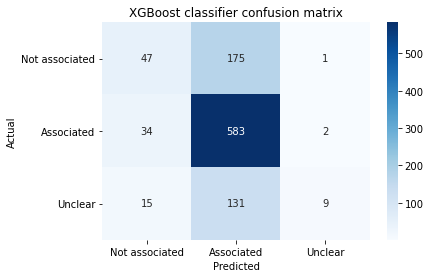

In [142]:
cm_xgb = confusion_matrix(y_test, y_pred_xgboost)
print(cm_xgb)
ax = sns.heatmap(cm_xgb, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('XGBoost classifier confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### Random Forest

In [65]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_y_pred)
print("Accuracy: %.2f%%" % (random_forest_acc * 100.0))

Accuracy: 63.89%


[[ 47 175   1]
 [ 34 581   4]
 [ 15 131   9]]


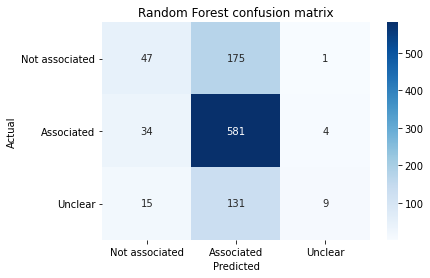

In [140]:
cm_rf = confusion_matrix(y_test, random_forest_y_pred)
print(cm_rf)
ax = sns.heatmap(cm_rf, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('Random Forest confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### Bagging classifier

In [67]:
bagging = BaggingClassifier(base_estimator=SVC(),
                            n_estimators = 5,
                            random_state = 2)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bagging)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.19%


[[ 39 184   0]
 [ 30 589   0]
 [  5 148   2]]


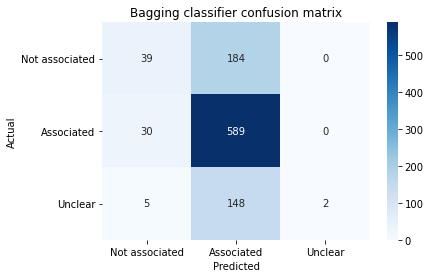

In [139]:
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print(cm_bagging)
ax = sns.heatmap(cm_bagging, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('Bagging classifier confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### Stacking classifier

In [124]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators = 100, random_state = 2)),
    ('xgboost', XGBClassifier(max_depth = 12,
                        learning_rate = 0.001,
                        n_estimators = 10,
                        n_jobs = -1,
                        eval_metric = 'mlogloss', 
                        use_label_encoder=False)),
    ('bagging', BaggingClassifier(base_estimator=SVC(),
                            n_estimators = 5,
                            random_state = 2))
]

stacking = StackingClassifier(estimators = estimators, 
                              final_estimator = LogisticRegression(),
                              n_jobs = -1, cv = 10)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_stacking)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.79%


[[ 46 175   2]
 [ 36 570  13]
 [ 17 128  10]]


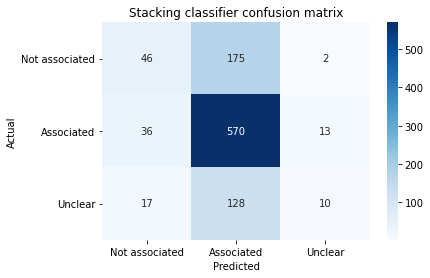

In [134]:
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
print(cm_stacking)
ax = sns.heatmap(cm_stacking, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('Stacking classifier confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### AdaBoost

In [109]:
adaboost = AdaBoostClassifier(n_estimators = 10,
                              learning_rate = 0.001,
                              algorithm = 'SAMME',
                              random_state = 25)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.09%


[[  0 223   0]
 [  0 619   0]
 [  0 155   0]]


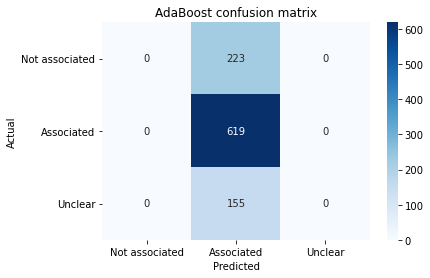

In [135]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print(cm_adaboost)
ax = sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('AdaBoost confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### Histogram Gradient Boost

In [119]:
histGradBoost = HistGradientBoostingClassifier(loss = 'categorical_crossentropy',
                                               learning_rate = 0.001,
                                               max_iter = 1000,
                                               max_leaf_nodes = 63, 
                                               l2_regularization = 0.01,
                                               random_state = 2)
histGradBoost.fit(X_train, y_train)
y_pred_hist = histGradBoost.predict(X_test)
accuracy_hgb = accuracy_score(y_test, y_pred_hist)
print("Accuracy:  %.2f%%" % (accuracy_hgb * 100.0))

Accuracy:  63.69%


[[ 28 195   0]
 [ 14 605   0]
 [  6 147   2]]


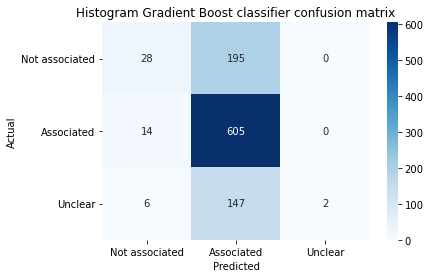

In [137]:
cm_hist = confusion_matrix(y_test, y_pred_hist)
print(cm_hist)
ax = sns.heatmap(cm_hist, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('Histogram Gradient Boost classifier confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

### Baseline (Support Vector Machine)

In [66]:
svm_x_train = X_train[:, :2]
svm_x_test = X_test[:, :2]
ytrain_sq = np.squeeze(y_train)
y_test_svm = np.squeeze(y_test)
support_vector = LinearSVC(C = 10, max_iter = 50000) 
support_vector.fit(svm_x_train, ytrain_sq)
support_vector_y_pred = support_vector.predict(svm_x_test)
support_vector_acc = accuracy_score(y_test_svm, support_vector_y_pred)

print("Accuracy: %.2f%%" % (support_vector_acc * 100.0))

Accuracy: 62.09%


[[  0 223   0]
 [  0 619   0]
 [  0 155   0]]


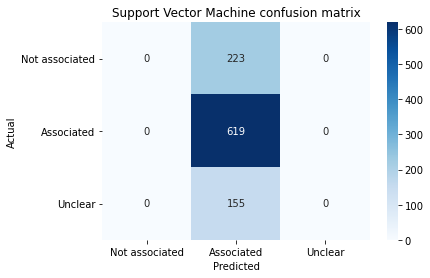

In [138]:
cm_svm = confusion_matrix(y_test, support_vector_y_pred)
print(cm_svm)
ax = sns.heatmap(cm_svm, annot=True, fmt='d', cmap = 'Blues');
ax.set_title('Support Vector Machine confusion matrix');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'])
ax.yaxis.set_ticklabels(['Not associated', 'Associated', 'Unclear'],
                        rotation = 0)

plt.show()

In [143]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)): 
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

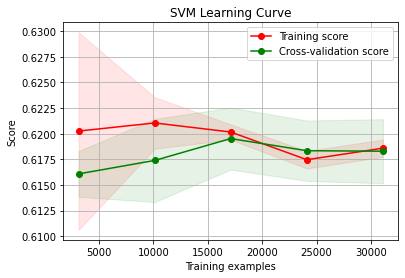

In [144]:
plt = plot_learning_curve(estimator = support_vector ,title = 'SVM Learning Curve', X=X_train,y=y_train)
plt.show()

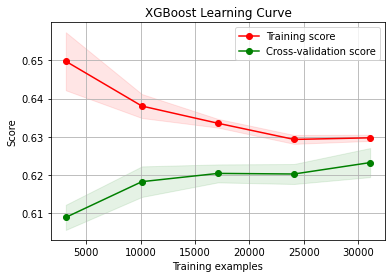

In [145]:
plt = plot_learning_curve(estimator = xgboost ,title = 'XGBoost Learning Curve', X=X_train,y=y_train)
plt.show()

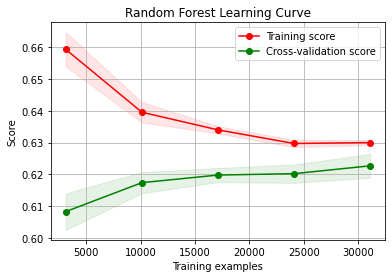

In [146]:
plt = plot_learning_curve(estimator = random_forest ,title = 'Random Forest Learning Curve', X=X_train,y=y_train)
plt.show()

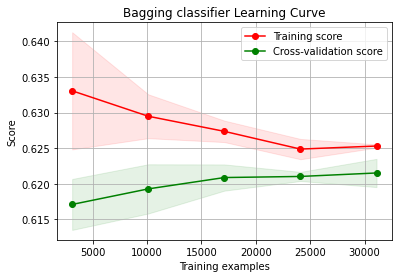

In [147]:
plt = plot_learning_curve(estimator = bagging ,title = 'Bagging classifier Learning Curve', X=X_train,y=y_train)
plt.show()

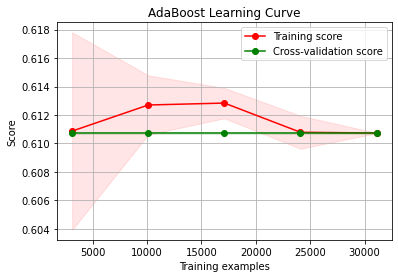

In [154]:
plt = plot_learning_curve(estimator = adaboost ,title = 'AdaBoost Learning Curve', X=X_train,y=y_train)
plt.show()

KeyboardInterrupt: 

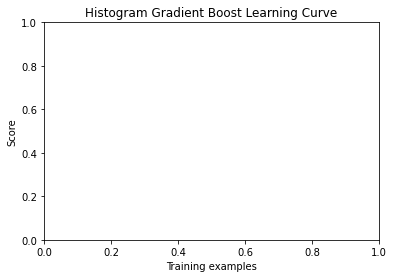

In [155]:
plt = plot_learning_curve(estimator = histGradBoost ,title = 'Histogram Gradient Boost Learning Curve', X=X_train,y=y_train)
plt.show()